In [ ]:
import pandas as pd
data = pd.read_excel('water_quality_2018corrected.xlsx')
print("The dataset is given below.")
data.head(5)

The dataset is given below.


,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2 _Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max
0,1448,"NAGAVALLI AT THOTAPALLI REGULATOR, A.P.",ANDHRA PRADESH,25.0,NaN,5.2,7.2,6.0,8.0,277,1342,1.2,1.8,1.26,17.11,7.0,75.0,210.0,2400.0
1,2352,"RIVER VAMSHADHARA, KALINGAPATNAM, VIZIANAGARAM...",ANDHRA PRADESH,25.0,30.0,5.1,7.2,6.9,8.0,248,7526,0.9,2.2,1.27,14.53,9.0,45.0,120.0,1100.0
2,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",27.6,32.1,5.1,6.7,7.2,8.2,163,290,1,4.0,0.1,1.32,2.0,130.0,15.0,920.0
3,2459,"AT ZARI CAUSE WAY BRIDGE, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.4,3.8,6.6,7.1,8.1,547,10794,2,28.0,0.16,2.20,26.0,350.0,120.0,1600.0
4,2460,"DISCHARGE POINT OF DISTILLERY, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.2,4.1,6.8,7.3,8.4,7650,39705,1.6,38.0,0.18,1.84,26.0,350.0,58.0,1600.0


In [ ]:
data.isnull().any()

Station_code          False
Station_Name          False
State_Name            False
Temp_Min               True
Temp_Max               True
Dissolved_O2 _Min     False
Dissolved_O2_Max      False
pH_Min                False
pH_Max                False
Conductivity_Min      False
Conductivity_Max      False
BOD_Min                True
BOD_Max                True
Nitrate_Min            True
Nitrate_Max            True
Fecal_Coliform_Min     True
Fecal_Coliform_Max     True
Total_Coliform_Min     True
Total_Coliform_Max     True
dtype: bool

In [ ]:
#replace BDL by 0
df=data.replace(to_replace="BDL",value=0)

In [ ]:
df1=df.dropna()
df1.isnull().any()

Station_code          False
Station_Name          False
State_Name            False
Temp_Min              False
Temp_Max              False
Dissolved_O2 _Min     False
Dissolved_O2_Max      False
pH_Min                False
pH_Max                False
Conductivity_Min      False
Conductivity_Max      False
BOD_Min               False
BOD_Max               False
Nitrate_Min           False
Nitrate_Max           False
Fecal_Coliform_Min    False
Fecal_Coliform_Max    False
Total_Coliform_Min    False
Total_Coliform_Max    False
dtype: bool

In [ ]:
df1.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2 _Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max
1,2352,"RIVER VAMSHADHARA, KALINGAPATNAM, VIZIANAGARAM...",ANDHRA PRADESH,25.0,30.0,5.1,7.2,6.9,8.0,248,7526,0.9,2.2,1.27,14.53,9.0,45.0,120.0,1100.0
2,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",27.6,32.1,5.1,6.7,7.2,8.2,163,290,1.0,4.0,0.10,1.32,2.0,130.0,15.0,920.0
3,2459,"AT ZARI CAUSE WAY BRIDGE, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.4,3.8,6.6,7.1,8.1,547,10794,2.0,28.0,0.16,2.20,26.0,350.0,120.0,1600.0
4,2460,"DISCHARGE POINT OF DISTILLERY, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.2,4.1,6.8,7.3,8.4,7650,39705,1.6,38.0,0.18,1.84,26.0,350.0,58.0,1600.0
5,2461,"AT DAMAN JETTY, MOTI DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,32.1,4.6,7.2,6.9,7.9,6180,59212,1.8,108.0,0.15,1.80,33.0,280.0,84.0,1600.0


In [ ]:
#Parameter threshold values
#Threshold values were collected from Research papers and websites
temp_min_threshold = 10.0
temp_max_threshold = 22.0
dissolved_O2_min_threshold = 6.5
dissolved_O2_max_threshold = 8.0
ph_min_threshold = 6.5
ph_max_threshold = 8.5
conductivity_min_threshold = 50
conductivity_max_threshold = 1500
bod_max_threshold = 3
nitrate_max_threshold = 45
total_coliform_max_threshold = 50

In [ ]:
# Create the Potability column based on rules
# Initialize as " Not Potable"
df1['Potability'] = 'Not Potable'

<ipython-input-7-2a55f908dca0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Potability'] = 'Not Potable'


In [ ]:
df1.loc[(df1['Temp_Min'] < temp_min_threshold) |
 (df1['Temp_Max'] < temp_max_threshold) &
 (df1['Dissolved_O2_Max'] < dissolved_O2_max_threshold) &
 (df1['pH_Min'] < ph_min_threshold) |
 (df1['pH_Max'] < ph_max_threshold) &
 (df1['Conductivity_Min'] < conductivity_min_threshold) |
 (df1['Conductivity_Max'] < conductivity_max_threshold) &
 (df1['BOD_Max'] < bod_max_threshold) &
 (df1['Nitrate_Max'] < nitrate_max_threshold) &
 (df1['Total_Coliform_Max'] < total_coliform_max_threshold), 'Potability'] = 'Potable'

In [ ]:
df1.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2 _Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability
1,2352,"RIVER VAMSHADHARA, KALINGAPATNAM, VIZIANAGARAM...",ANDHRA PRADESH,25.0,30.0,5.1,7.2,6.9,8.0,248,7526,0.9,2.2,1.27,14.53,9.0,45.0,120.0,1100.0,Not Potable
2,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",27.6,32.1,5.1,6.7,7.2,8.2,163,290,1.0,4.0,0.10,1.32,2.0,130.0,15.0,920.0,Not Potable
3,2459,"AT ZARI CAUSE WAY BRIDGE, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.4,3.8,6.6,7.1,8.1,547,10794,2.0,28.0,0.16,2.20,26.0,350.0,120.0,1600.0,Not Potable
4,2460,"DISCHARGE POINT OF DISTILLERY, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.2,4.1,6.8,7.3,8.4,7650,39705,1.6,38.0,0.18,1.84,26.0,350.0,58.0,1600.0,Not Potable
5,2461,"AT DAMAN JETTY, MOTI DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,32.1,4.6,7.2,6.9,7.9,6180,59212,1.8,108.0,0.15,1.80,33.0,280.0,84.0,1600.0,Not Potable


In [ ]:
d=df1['Potability']
pd.set_option('display.max_rows', None)
d.head(15)

1     Not Potable
2     Not Potable
3     Not Potable
4     Not Potable
5     Not Potable
6     Not Potable
7     Not Potable
8     Not Potable
9     Not Potable
10    Not Potable
11    Not Potable
12        Potable
13    Not Potable
14        Potable
15    Not Potable
Name: Potability, dtype: object

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['potab_label'] = le.fit_transform(df1['Potability'])

<ipython-input-11-a84b7affeb10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['potab_label'] = le.fit_transform(df1['Potability'])


In [ ]:
df1.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2 _Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,...,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability,potab_label
1,2352,"RIVER VAMSHADHARA, KALINGAPATNAM, VIZIANAGARAM...",ANDHRA PRADESH,25.0,30.0,5.1,7.2,6.9,8.0,248,...,0.9,2.2,1.27,14.53,9.0,45.0,120.0,1100.0,Not Potable,0
2,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",27.6,32.1,5.1,6.7,7.2,8.2,163,...,1.0,4.0,0.10,1.32,2.0,130.0,15.0,920.0,Not Potable,0
3,2459,"AT ZARI CAUSE WAY BRIDGE, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.4,3.8,6.6,7.1,8.1,547,...,2.0,28.0,0.16,2.20,26.0,350.0,120.0,1600.0,Not Potable,0
4,2460,"DISCHARGE POINT OF DISTILLERY, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.2,4.1,6.8,7.3,8.4,7650,...,1.6,38.0,0.18,1.84,26.0,350.0,58.0,1600.0,Not Potable,0
5,2461,"AT DAMAN JETTY, MOTI DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,32.1,4.6,7.2,6.9,7.9,6180,...,1.8,108.0,0.15,1.80,33.0,280.0,84.0,1600.0,Not Potable,0


TIME SERIES

<Axes: title={'center': ' Water Potability Distribution'}, ylabel='potab_label'>

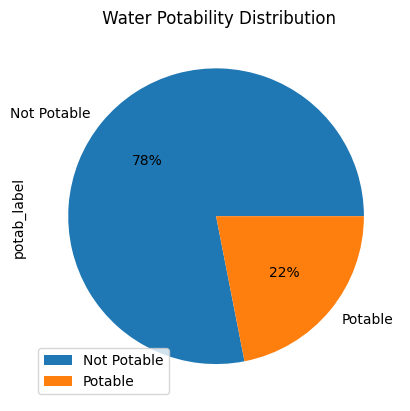

In [ ]:
#1
import matplotlib.pyplot as plt
df1.groupby(['Potability']).count().plot(kind='pie', y='potab_label',autopct='%1.0f%%',title=" Water Potability Distribution")

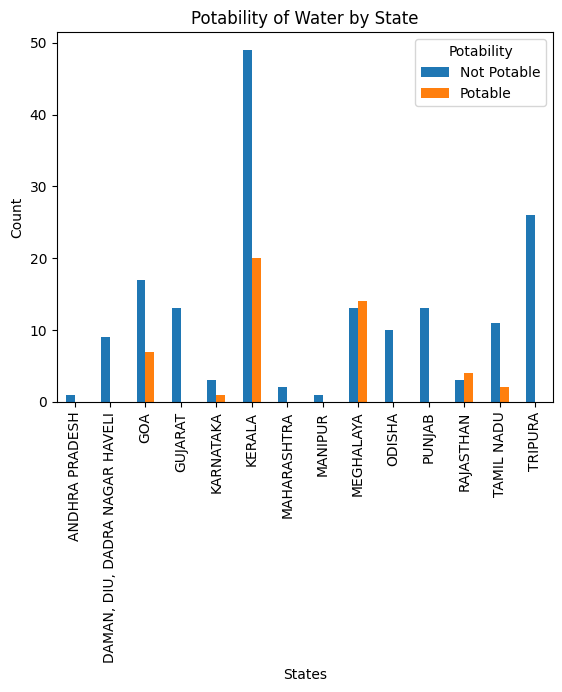

In [ ]:
#2
import matplotlib.pyplot as plt
grouped_data = df1.groupby(['State_Name', 'Potability']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar', stacked=False)
ax.set_xlabel('States')
ax.set_ylabel('Count')
ax.set_title('Potability of Water by State')
plt.show()

Decision Tree


In [ ]:
X = df1.drop(["Station_code","Station_Name","State_Name","Potability","potab_label"], axis ='columns')
y = df1[['potab_label']]

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)
from sklearn import tree
model=DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(X_train,y_train)
X_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,X_pred))

Accuracy_score: 0.9545454545454546


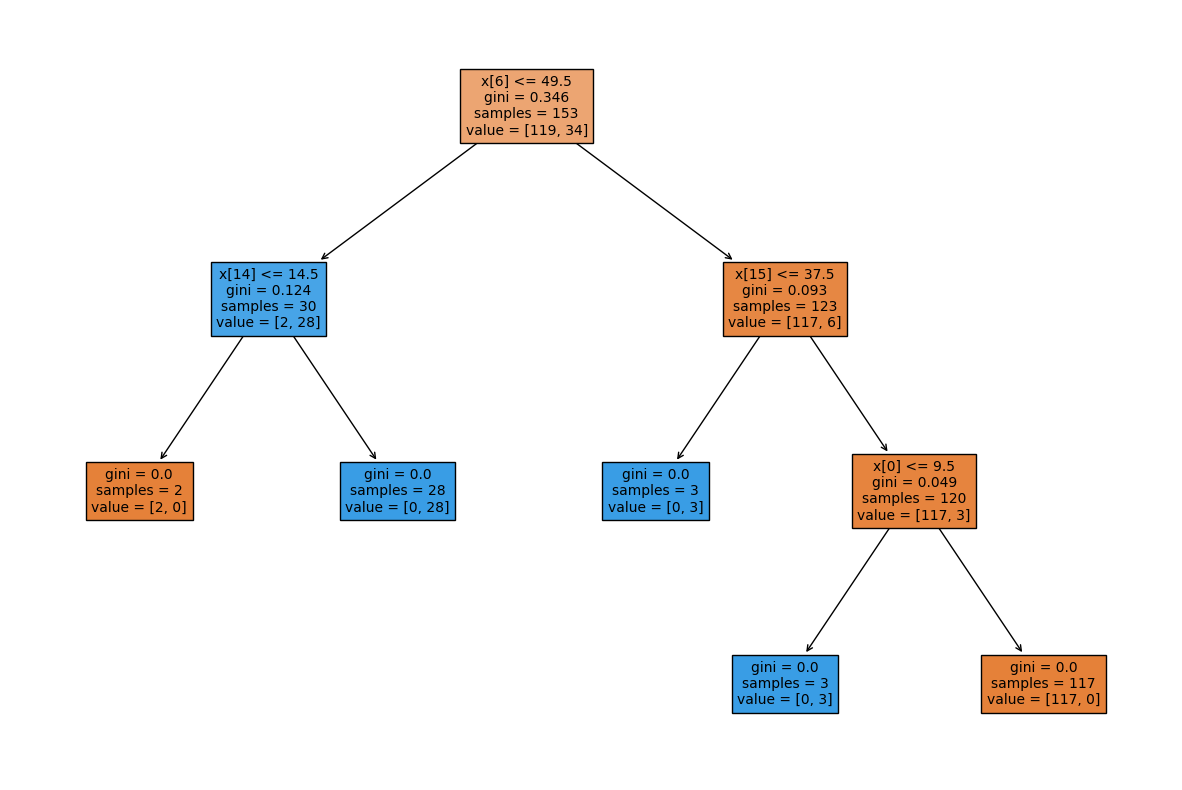

In [ ]:
#visualize tree
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(15,10))
tree.plot_tree(model,fontsize=10,filled=True,impurity=True)
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)
X_pred=model.predict(X_test)
model.score(X_test, y_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,X_pred))

Accuracy_score: 0.7727272727272727


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9545454545454546


SVM ALGORITHM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svm=SVC(C= 100)
svm.fit(X_train,y_train)
print("Accuracy: {:.2f}".format(svm.score(X_test,y_test)))

Accuracy: 0.79


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SUITABILITY

In [ ]:
df2 = df1
df2.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2 _Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,...,BOD_Min,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability,potab_label
1,2352,"RIVER VAMSHADHARA, KALINGAPATNAM, VIZIANAGARAM...",ANDHRA PRADESH,25.0,30.0,5.1,7.2,6.9,8.0,248,...,0.9,2.2,1.27,14.53,9.0,45.0,120.0,1100.0,Not Potable,0
2,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",27.6,32.1,5.1,6.7,7.2,8.2,163,...,1.0,4.0,0.10,1.32,2.0,130.0,15.0,920.0,Not Potable,0
3,2459,"AT ZARI CAUSE WAY BRIDGE, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.4,3.8,6.6,7.1,8.1,547,...,2.0,28.0,0.16,2.20,26.0,350.0,120.0,1600.0,Not Potable,0
4,2460,"DISCHARGE POINT OF DISTILLERY, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.2,4.1,6.8,7.3,8.4,7650,...,1.6,38.0,0.18,1.84,26.0,350.0,58.0,1600.0,Not Potable,0
5,2461,"AT DAMAN JETTY, MOTI DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,32.1,4.6,7.2,6.9,7.9,6180,...,1.8,108.0,0.15,1.80,33.0,280.0,84.0,1600.0,Not Potable,0


In [ ]:
#Parameter threshold values
#Threshold values were collected from Research papers and websites
temp_min_threshold = 20.0
temp_max_threshold = 30.0
dissolved_O2_min_threshold = 5.0
dissolved_O2_max_threshold = 8.0
ph_min_threshold = 6.5
ph_max_threshold = 7.0
conductivity_min_threshold = 500
conductivity_max_threshold = 1500
bod_min_threshold = 2
bod_max_threshold = 5
nitrate_max_threshold = 5
fecal_coliform_min_threshold = 10
fecal_coliform_max_threshold = 1500
total_coliform_min_threshold = 100
total_coliform_max_threshold = 10000

In [ ]:
# Create the Suitability column based on rules
# Initialize as "Not Clean"
df2['Suitability'] = 'Not Clean'

<ipython-input-23-261e49f265b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Suitability'] = 'Not Clean'


In [ ]:
df2.loc[(df2['Temp_Min'] < temp_min_threshold) |
 (df2['Temp_Max'] < temp_max_threshold) &
 (df2['Dissolved_O2 _Min']<dissolved_O2_min_threshold)|
 (df2['Dissolved_O2_Max'] < dissolved_O2_max_threshold) &
 (df2['pH_Min'] < ph_min_threshold) |
 (df2['pH_Max'] < ph_max_threshold) &
 (df2['Conductivity_Min'] < conductivity_min_threshold) |
 (df2['Conductivity_Max'] < conductivity_max_threshold) &
 (df2['BOD_Min'] < bod_min_threshold) |
 (df2['BOD_Max'] < bod_max_threshold) &
 (df2['Nitrate_Max'] > nitrate_max_threshold) &
 (df2['Fecal_Coliform_Max'] < fecal_coliform_max_threshold) &
 (df2['Total_Coliform_Min'] < total_coliform_min_threshold) |
 (df2['Total_Coliform_Max'] < total_coliform_max_threshold), 'Suitability'] = 'Clean'

In [ ]:
df2.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2 _Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,...,BOD_Max,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability,potab_label,Suitability
1,2352,"RIVER VAMSHADHARA, KALINGAPATNAM, VIZIANAGARAM...",ANDHRA PRADESH,25.0,30.0,5.1,7.2,6.9,8.0,248,...,2.2,1.27,14.53,9.0,45.0,120.0,1100.0,Not Potable,0,Clean
2,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",27.6,32.1,5.1,6.7,7.2,8.2,163,...,4.0,0.10,1.32,2.0,130.0,15.0,920.0,Not Potable,0,Clean
3,2459,"AT ZARI CAUSE WAY BRIDGE, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.4,3.8,6.6,7.1,8.1,547,...,28.0,0.16,2.20,26.0,350.0,120.0,1600.0,Not Potable,0,Clean
4,2460,"DISCHARGE POINT OF DISTILLERY, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.2,4.1,6.8,7.3,8.4,7650,...,38.0,0.18,1.84,26.0,350.0,58.0,1600.0,Not Potable,0,Clean
5,2461,"AT DAMAN JETTY, MOTI DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,32.1,4.6,7.2,6.9,7.9,6180,...,108.0,0.15,1.80,33.0,280.0,84.0,1600.0,Not Potable,0,Clean


In [ ]:
d1=df2['Suitability']
pd.set_option('display.max_rows', None)
d1.head(15)

1         Clean
2         Clean
3         Clean
4         Clean
5         Clean
6         Clean
7         Clean
8         Clean
9         Clean
10        Clean
11    Not Clean
12    Not Clean
13        Clean
14        Clean
15        Clean
Name: Suitability, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['suit_label'] = le.fit_transform(df2['Suitability'])

<ipython-input-27-498c821f603f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['suit_label'] = le.fit_transform(df2['Suitability'])


In [ ]:
df2.head(5)

,Station_code,Station_Name,State_Name,Temp_Min,Temp_Max,Dissolved_O2 _Min,Dissolved_O2_Max,pH_Min,pH_Max,Conductivity_Min,...,Nitrate_Min,Nitrate_Max,Fecal_Coliform_Min,Fecal_Coliform_Max,Total_Coliform_Min,Total_Coliform_Max,Potability,potab_label,Suitability,suit_label
1,2352,"RIVER VAMSHADHARA, KALINGAPATNAM, VIZIANAGARAM...",ANDHRA PRADESH,25.0,30.0,5.1,7.2,6.9,8.0,248,...,1.27,14.53,9.0,45.0,120.0,1100.0,Not Potable,0,Clean,0
2,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",27.6,32.1,5.1,6.7,7.2,8.2,163,...,0.10,1.32,2.0,130.0,15.0,920.0,Not Potable,0,Clean,0
3,2459,"AT ZARI CAUSE WAY BRIDGE, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.4,3.8,6.6,7.1,8.1,547,...,0.16,2.20,26.0,350.0,120.0,1600.0,Not Potable,0,Clean,0
4,2460,"DISCHARGE POINT OF DISTILLERY, DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,31.2,4.1,6.8,7.3,8.4,7650,...,0.18,1.84,26.0,350.0,58.0,1600.0,Not Potable,0,Clean,0
5,2461,"AT DAMAN JETTY, MOTI DAMAN","DAMAN, DIU, DADRA NAGAR HAVELI",28.0,32.1,4.6,7.2,6.9,7.9,6180,...,0.15,1.80,33.0,280.0,84.0,1600.0,Not Potable,0,Clean,0


TIME SERIES

<Axes: title={'center': 'Water Suitability Distribution'}, ylabel='suit_label'>

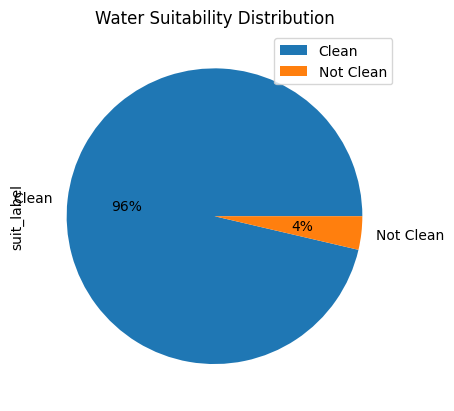

In [ ]:
#1
import matplotlib.pyplot as plt
df2.groupby(['Suitability']).count().plot(kind='pie', y='suit_label',autopct='%1.0f%%',title="Water Suitability Distribution")

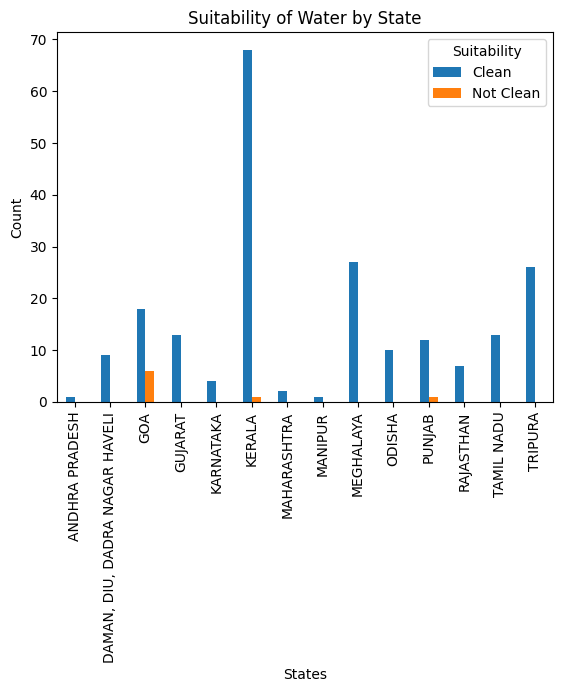

In [ ]:
#2
import matplotlib.pyplot as plt
grouped_data = df2.groupby(['State_Name', 'Suitability']).size().unstack(fill_value=0)
ax = grouped_data.plot(kind='bar', stacked=False)
ax.set_xlabel('States')
ax.set_ylabel('Count')
ax.set_title('Suitability of Water by State')
plt.show()

In [ ]:
#3
filtered_potable = df2[(df2['Potability'] == 'Potable')]
filtered_clean = df2[(df2['Suitability'] == 'Clean')]

summary_potable = filtered_potable['State_Name'].value_counts().reset_index()
summary_potable.columns = ['State', 'Potable Count']

summary_clean = filtered_clean['State_Name'].value_counts().reset_index()
summary_clean.columns = ['State', 'Clean Count']

summary_table = pd.merge(summary_potable, summary_clean, on='State', how='outer').fillna(0)
display('COUNT OF POTABLE AND CLEAN WATER IN EACH STATE')
print(summary_table)

'COUNT OF POTABLE AND CLEAN WATER IN EACH STATE'

                             State  Potable Count  Clean Count
0                           KERALA           20.0           68
1                        MEGHALAYA           14.0           27
2                              GOA            7.0           18
3                        RAJASTHAN            4.0            7
4                       TAMIL NADU            2.0           13
5                        KARNATAKA            1.0            4
6                          TRIPURA            0.0           26
7                          GUJARAT            0.0           13
8                           PUNJAB            0.0           12
9                           ODISHA            0.0           10
10  DAMAN, DIU, DADRA NAGAR HAVELI            0.0            9
11                     MAHARASHTRA            0.0            2
12                  ANDHRA PRADESH            0.0            1
13                         MANIPUR            0.0            1


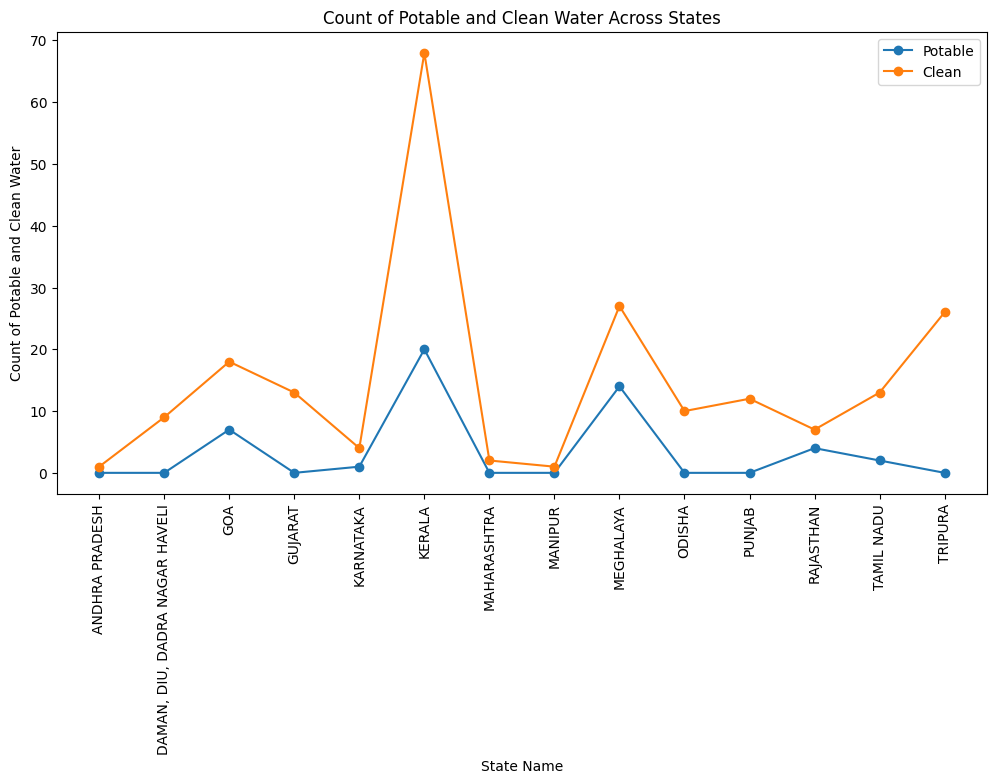

In [ ]:
#4
count_data = df2.groupby('State_Name').agg(
    count_Potable=('Potability', lambda x: (x == 'Potable').sum()),
    count_Clean=('Suitability', lambda x: (x == 'Clean').sum())).reset_index()

plt.figure(figsize=(12, 6))
plt.plot(count_data['State_Name'], count_data['count_Potable'], marker='o', linestyle='-', label='Potable')
plt.plot(count_data['State_Name'], count_data['count_Clean'], marker='o', linestyle='-', label='Clean')

plt.xlabel('State Name')
plt.ylabel('Count of Potable and Clean Water')
plt.title('Count of Potable and Clean Water Across States')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Decision Tree

In [ ]:
X = df2.drop(["Station_code","Station_Name","State_Name","Suitability","suit_label","Potability","potab_label"], axis ='columns')
y = df2[['suit_label']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=40,test_size=0.30)
model=DecisionTreeClassifier(max_depth=5,random_state=0)
model.fit(X_train,y_train)
X_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,X_pred))

Accuracy_score: 0.9696969696969697


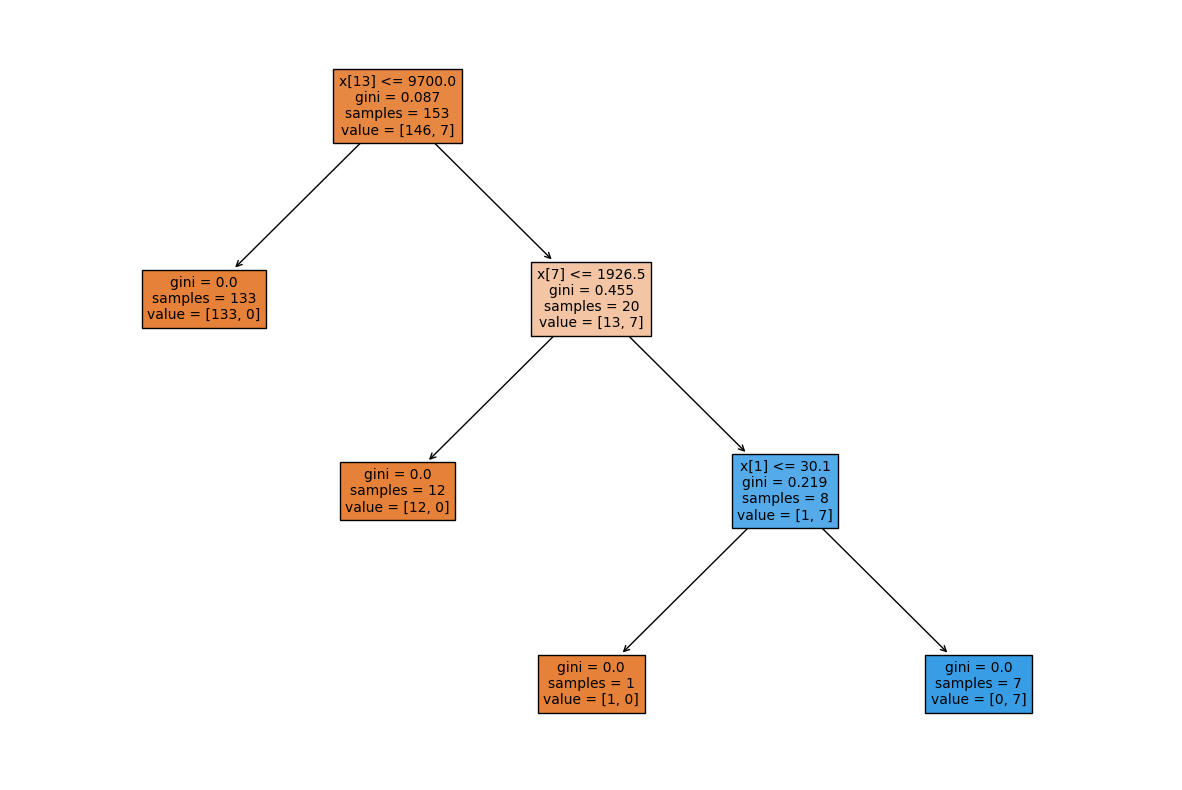

In [ ]:
#visualise tree
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(15,10))
tree.plot_tree(model,fontsize=10,filled=True,impurity=True)
plt.show()

LOGISTIC REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
model.predict(X_test)
X_pred=model.predict(X_test)
model.score(X_test, y_test)
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,X_pred))

Accuracy_score: 0.9545454545454546


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9848484848484849


SVM ALGORITHM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
svm=SVC(C= 100)
svm.fit(X_train,y_train)
print("Accuracy: {:.2f}".format(svm.score(X_test,y_test)))

Accuracy: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
